CHEM494 Final Project

Anna DeBernardo, Kailyn Schueller, and Maren Johnsen

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv('Solubility.csv')
df = df.drop_duplicates()

In [ ]:
ydf = df[['Solubility']]
xdf = df.select_dtypes(exclude=['object'])
del xdf['Solubility']

X_train, X_test, y_train, y_test = train_test_split(xdf,
                                                    ydf,
                                                    test_size=0.2,
                                                    random_state=1
                                                    )

scaler = StandardScaler()

X_train = scaler.fit_transform(np.array(X_train).reshape(-1,19))
X_test = scaler.fit_transform(np.array(X_test).reshape(-1,19))

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
clf = linear_model.BayesianRidge()

In [ ]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [ ]:
predvals_train = clf.predict(X_train)
predvals_test = clf.predict(X_test)

Text(0.5, 0, 'Actual Solubility')

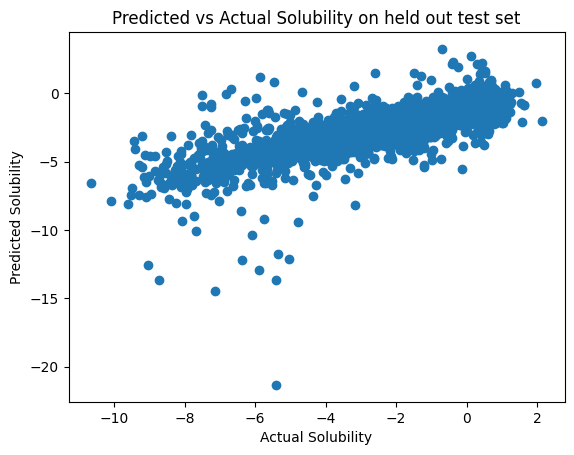

In [ ]:
plt.scatter(y_test, predvals_test)

plt.title('Predicted vs Actual Solubility on held out test set')
plt.ylabel('Predicted Solubility')
plt.xlabel('Actual Solubility')

In [ ]:
print('r2 train:',r2_score(y_train,predvals_train).round(2))
print('rmse train:',np.sqrt(mean_squared_error(y_train,predvals_train)).round(2))
print('r2 test:',r2_score(y_test,predvals_test).round(2))
print('rmse train:',np.sqrt(mean_squared_error(y_test,predvals_test)).round(2))

r2 train: 0.52
rmse train: 1.64
r2 test: 0.52
rmse train: 1.66


Now a data set with 4 parameters used (MolLogP, NumHAcceptors, NumHDonors, and NumAromaticRings).

In [ ]:
solubilitydf = df[['Solubility','MolLogP','NumHAcceptors','NumHDonors','NumAromaticRings']]

In [ ]:
ydf = solubilitydf[['Solubility']]
xdf = solubilitydf[['MolLogP','NumHAcceptors','NumHDonors','NumAromaticRings']]

X_train, X_test, y_train, y_test = train_test_split(xdf,
                                                    ydf,
                                                    test_size=0.2,
                                                    random_state=1
                                                    )

scaler = StandardScaler()

X_train = scaler.fit_transform(np.array(X_train).reshape(-1,4))
X_test = scaler.fit_transform(np.array(X_test).reshape(-1,4))

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
clf = linear_model.BayesianRidge()
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [ ]:
predvals_train = clf.predict(X_train)
predvals_test = clf.predict(X_test)

Text(0.5, 0, 'Actual Solubility')

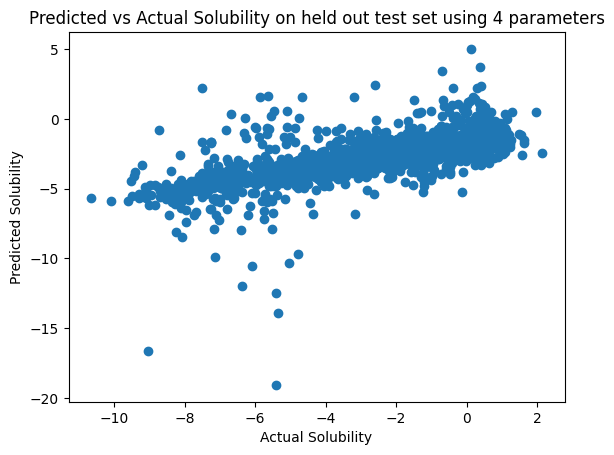

In [ ]:
plt.scatter(y_test, predvals_test)

plt.title('Predicted vs Actual Solubility on held out test set using 4 parameters')
plt.ylabel('Predicted Solubility')
plt.xlabel('Actual Solubility')

In [ ]:
print('r2 train:',r2_score(y_train,predvals_train).round(2))
print('rmse train:',np.sqrt(mean_squared_error(y_train,predvals_train)).round(2))
print('r2 test:',r2_score(y_test,predvals_test).round(2))
print('rmse train:',np.sqrt(mean_squared_error(y_test,predvals_test)).round(2))

r2 train: 0.41
rmse train: 1.81
r2 test: 0.44
rmse train: 1.79


Now considering a truncated data set and all 19 parameters used.

In [ ]:
df = df[:1000]

In [ ]:
ydf = df[['Solubility']]
xdf = df.select_dtypes(exclude=['object'])
del xdf['Solubility']

X_train, X_test, y_train, y_test = train_test_split(xdf,
                                                    ydf,
                                                    test_size=0.2,
                                                    random_state=1
                                                    )

scaler = StandardScaler()

X_train = scaler.fit_transform(np.array(X_train).reshape(-1,19))
X_test = scaler.fit_transform(np.array(X_test).reshape(-1,19))

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
clf = linear_model.BayesianRidge()
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [ ]:
predvals_train = clf.predict(X_train)
predvals_test = clf.predict(X_test)

Text(0.5, 0, 'Actual Solubility')

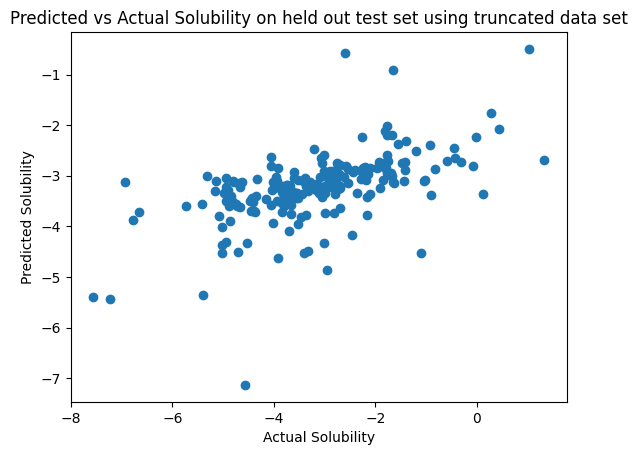

In [ ]:
plt.scatter(y_test, predvals_test)

plt.title('Predicted vs Actual Solubility on held out test set using truncated data set')
plt.ylabel('Predicted Solubility')
plt.xlabel('Actual Solubility')

In [ ]:
print('r2 train:',r2_score(y_train,predvals_train).round(2))
print('rmse train:',np.sqrt(mean_squared_error(y_train,predvals_train)).round(2))
print('r2 test:',r2_score(y_test,predvals_test).round(2))
print('rmse train:',np.sqrt(mean_squared_error(y_test,predvals_test)).round(2))

r2 train: 0.28
rmse train: 1.28
r2 test: 0.31
rmse train: 1.23
